In [22]:
frm = get.get_aggregated_data('syd', aggtype = 'sa4', refresh = True)

Getting data for syd aggregated to sa4...
Generating...
Aggregating spatially and temporally...
Aggregating to sa4...
Adding possible journeys...
Getting quadkey weights...
Quadkey weights retrieved.
Added possible journeys.
Splitting frame by possible journey...
Frame split.
Aggregated.
Combining by date...
Splitting datetimes...
Splitting datetimes.
Combined.
Spatiotemporally aggregated.
Done.


In [10]:
import load
import aggregate

In [4]:
frm = load.load_fb('syd')

<AxesSubplot:>

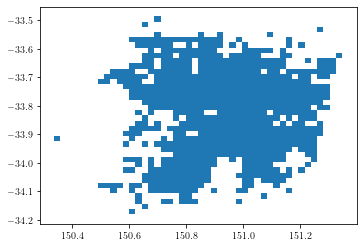

In [15]:
quadkeys = frm.loc[:'2020-11'].index.levels[1]
quadfrm = aggregate.make_quadfrm(quadkeys)
quadfrm.plot()

<AxesSubplot:>

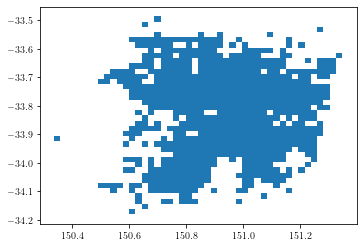

In [19]:
quadkeys = frm.loc['2020-12-27'].index.levels[1]
quadfrm = aggregate.make_quadfrm(quadkeys)
quadfrm.plot()

<AxesSubplot:>

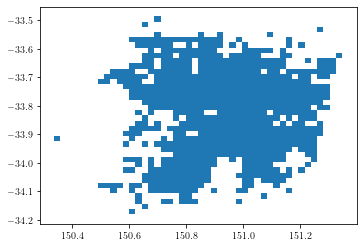

In [20]:
quadkeys = frm.loc['2020-12-28'].index.levels[1]
quadfrm = aggregate.make_quadfrm(quadkeys)
quadfrm.plot()

In [21]:
frm

datetime                   quadkey         end_key         km   
2020-05-01 10:00:00+10:00  31123012313030  31123012313030  False     41
                           31123013020332  31123013020332  False     20
                           31123013021032  31123013021032  False      5
                           31123013021200  31123013021200  False      6
                           31123013021230  31123013021230  False      4
                                                                   ... 
2021-06-26 02:00:00+10:00  31123013230211  31123013230211  False     12
                           31123013230220  31123013230220  False     23
                           31123013230311  31123013230311  False     24
                           31123013231213  31123013210331  True      35
                                           31123013231213  False    287
Name: n, Length: 953961, dtype: int64

Getting data for syd aggregated to sa4...
Loading...
Loaded.
Done.


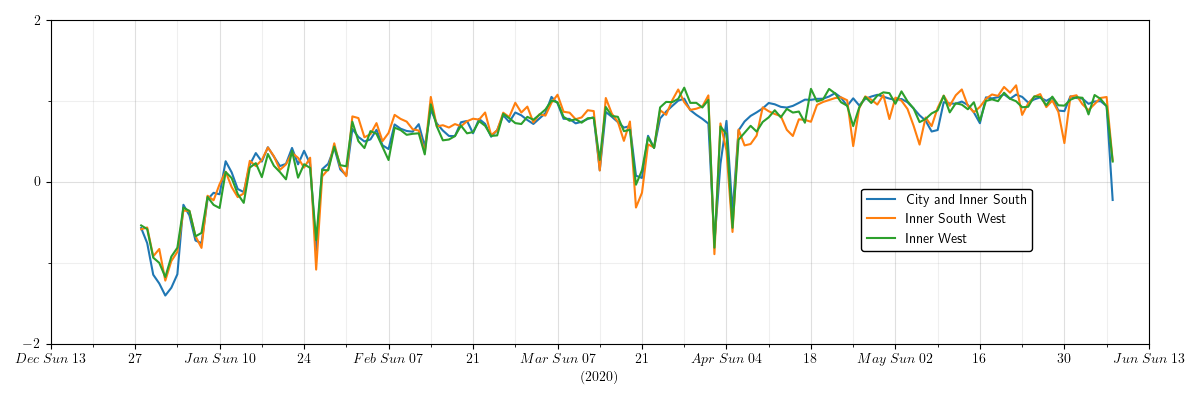

In [1]:
from functools import partial

import pandas as pd
idx = pd.IndexSlice

import get
import load

import aliases
import analysis

from everest import window


frm = get.get_aggregated_data('syd', aggtype = 'sa4')
metro = load.load_sa(4, 'syd')
frm = frm.loc[idx[:], metro.index]
# frm = frm.loc['2021-01-01':]

mobprops = analysis.mobile_proportion(frm).dropna()
scores = mobprops.groupby(level = 'start') \
    .apply(partial(analysis.calculate_day_scores, n = 8)) \
    .dropna()

canvas = window.Canvas(size = (12, 4))
ax = canvas.make_ax()
linenames = []
for start, series in scores.groupby(level = 'start'):
    name = metro.loc[start]['name']
    if not 'Inner' in name:
        continue
    linenames.append(name.split(' - ')[-1])
    ax.line(
        series.index.get_level_values('date'),
        window.DataChannel(series.values, lims = (-2, 2), capped = (True, True)),
        )
ax.props.legend.set_handles_labels([row[0] for row in ax.collections], linenames)
ax.props.legend.mplprops['bbox_to_anchor'] = (0.9, 0.5)
ax.props.legend.frame.visible = True
canvas

In [ ]:
frm = get.get_aggregated_data('syd', aggtype = 'sa4')

In [ ]:
metro

In [ ]:
frm = get.get_aggregated_data('syd', aggtype = 'sa4')
frm.xs(117, level = 'start')

In [ ]:
frm = get.get_aggregated_data('nsw', aggtype = 'sa4')
frm.xs(117, level = 'start')

In [ ]:
aggregate.SpatialAggregator.